<center>
    <h1 Style='color:#14327e'>Programa Tecnico de Analisis de Datos</h1>
    <h3 Style='color:#14327e'>Curso: Introduccion a Machine Learning</h3>
    <h5 Style='color:#14327e'>Ejemplo: Regresion Lineal Multiple</h5>
</center>

<p Style='text-align: justify'> El presente ejemplo programado pretende motivar el analisis respecto a la generacion de un modelo de regresion lineal multiple, para ello, reutilizaremos el set de datos utilizado para el ejemplo de la RLS, con el propósito de contrastar el proceso de selección de variables de un modelo a otro.
<br>
<br>
En ese sentido, este ejercicio requiere del analisis de cada una de las lineas de codigo por parte de los estudiantes, de manera que se propicie un espacio de investigacion y consultas sobre el tema bajo estudio <p/>

<h4 Style='color:#ecbd5c'>Importando las Librerias necesarias<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como es de su conocimiento las librerias periten desarrollar la funcionalidad y los codigos fuentes necesarios para la manipulacion de los datos, entre las que se abordaron el cuatrimestre anterior tenemos Pandas, Numpy, y Matplotlib.
<br>
<br>
En este ejercicio continuaremos utilizando la libreria Sklearn, especificamente las funcionalidades asociadas a los modelos lineales, siendo esta el principal insumo para implementar una regresion lineal multiple.
<br>
<br>
En el siguiente enlace podran consultar y leer mas sobre la libreria Sklearn, especificamente el modulo de modelos lineales.
</p>
<br>
<br>   
<table>
  <tr>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Libreria SKlearn, modelo de regresion lineal. Insumo para lectura</a></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Instruccion: Por favor proceda a realizar la lectura del enlace adjunto para un mayor entendimiento de la funcionalidad, asimismo, en caso de ser necesario proceda a realizar una indagacion adicional.</td>
  </tr>
</table>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

<h4 Style='color:#ecbd5c'>Carga de datos para el modelo<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> El proceso de carga de datos se realizara de la misma manera en la cual se efectuo durante el curso anterior, sin embargo, previo a realizar la carga es necesario aportar la siguiente meta data.
</p>
    
<h5 Style='color:#179fa1'>Meta datos del set para analisis (FuelConsumption.csv)<h5>   
<p  Style='text-align: justify; font-style: normal; font-weight: normal'> Hemos obetnido un conjunto de datos de consumo de combustible, FuelConsumption.csv, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos para la venta minorista en un pais. A continuacion se identifican las variables y un ejemplo de los valores para conocer cual es el dominio de esa variable:
</p>
<img src="meta.png" alt="Meta data" width="300">

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# Observemos el set de datos
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h4 Style='color:#ecbd5c'>Una exploracion rapida de los datos<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como este ejercicio se centra en el desarrollo de un modelo de regresion linea, y con el proposito de no hacerlo extenso, para su analisis. Se realizara una exploracion rapida para identifcar y conocer en la generalidad los datos disponibles en el set de datos.
<br>
<br>    
Sin embargo, esto no sustituye los pasos aprendidos durante el cuatrimestre anterior, siempre es necesario conocer y gestionar adecuadamente el set de datos para su analisis y diseno de modelos predictivos.
</p>
<br>   
<table>
  <tr>
    <td> <alt="IMPORTANTE"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Es importante conocer que todo trabajo de ciencia de datos debe cumplir con la metodologia aprendida en el curso de Analisis de Datos, de manera que, los pasos y procesos aprendidos durante ese curso son necesarios para un adecuado desarrollo de modelos predictivos.</td>
      <td><alt="CONSIDERACION"/></td>
      <td Style='text-align: justify; font-style: normal; font-weight: normal'>Para este ejemplo se omiten los pasos relacioandos con la estandarizacion, homologacion, limpieza, y graficado de datos, para centrarnos en el desarrollo del modelo de regresion lineal.</td>
  </tr>
    </table>

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.shape

(1067, 13)

<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como se menciono el ejercicio considete en poder predicir la cantidad de emisiones de CO2 de los vehiculos en funcion de sus caracteristicas, por esto se realiza un descarte para dejar unicamente las caracteristicas que estan relacionadas con le emision del CO2 en un vehiculo.
<br>
<br>    
En este caso, esas variables esrian Enginesize, Cylinders, FuelConsumption, Co2Emissions. particularmente las variable a predecir es CO2Emissions, y las otras variables por su relacion con la emision de CO2 en el motor de un vehiculo podrian funcionar como pariables predictoras, sin embargo hay que analizar una a una para ver su comportamiento y seleccionar la mas adecuada.
</p>

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


<p Style='text-align: justify; font-style: normal; font-weight: normal'> Al tratarse de una regresión lineal multiple, se deben seleccionar todas la variables que podrían influenciar en la emision de CO2, de manera que esas serán consideradas para generar el modelo predictivo. Importante denotar que siempre es necesario conocer la distribución de los valores para cada variable.
</p>

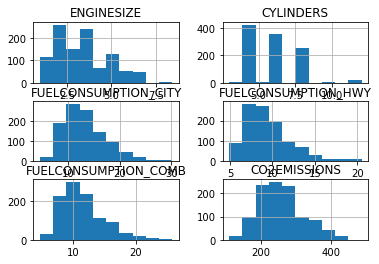

In [6]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como se puede apreciar cada una de ellas tiene su distribución, siendo que la variable CYLINDERS es la que presenta un comportamiento particular y diferenciado a las otras que tienen influencia en la emisión de CO2.

En ese sentido, al no requerirse la selección de una única variable y considerando que todas las seleccionadas tienen impacto en la emisión de CO2, vamos a proceder con la creación de del modelo predictivo.
</p>

<h4 Style='color:#ecbd5c'>Preparando el modelo de regresion lineal<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> Una vez transitada la etapa de analisis de datos y seleccion de las variables a utilizar en el modelo de regresion lineal se procede con la creacion de los set de datos de entrenamiento y pruebas.
<br>
<br>    
Train/Test Split implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien generaliza nuestro modelo en nuevos datos.
<br>
<br> 
Esto significa que conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, ¡lo que lo hace genial para probar! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.
<br>
<br> 
Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. El 80 % de todo el conjunto de datos se utilizará para entrenamiento y el 20 % para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función np.random.rand():
</p>
<br>
<br>   
<table>
  <tr>
    <td> <alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/">Informacion sobre set de entrenamiento y pruebas</a></td>
    <td><alt="CONSIDERACION"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Instruccion: Por favor proceda a realizar la lectura del enlace adjunto para un mayor entendimiento de la funcionalidad, asimismo, en caso de ser necesario proceda a realizar una indagacion adicional.</td>
  </tr>
</table>

In [7]:
msk = np.random.rand(len(df)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = cdf[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = cdf[~msk] #aca se especifica que el set de prueba esta conformado por el 20% de la data restante.

<h4 Style='color:#ecbd5c'>Generacion del modelo de Regresion Lineal<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> En realidad, existen múltiples variables que impactan la co2emisión. Cuando está presente más de una variable independiente, el proceso se denomina regresión lineal múltiple. Un ejemplo de regresión lineal múltiple es la predicción de co2emisiones utilizando las características FUELCONSUMPTION_COMB, EngineSize y Cylinders de carros. Lo bueno aquí es que el modelo de regresión lineal múltiple es la extensión del modelo de regresión lineal simple.
</p>

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.19938851  7.66449018  9.78300453]]


<p>Como se ha mencionado los coeficientes e interseccion son los parametros de la linea ajustada, sin embargo, al ser un modelo de regresión lineal múlitple esos parametros podrían presentar alguna inconsistencia, para solucionar esto podemo optar por utilizar el metodo simple de minimos cuadrados que esta en la librería scikit learn.
<br>
<br>
Mínimos cuadrados ordinarios (OLS)
<br>
<br>
OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable dependiente objetivo y las predichas por la función lineal. En otras palabras, intenta minimizar la suma de los errores cuadráticos (SSE) o el error cuadrático medio (MSE) entre la variable objetivo (y) y nuestra salida pronosticada ( 𝑦̂ ) sobre todas las muestras en el conjunto de datos.
<br>
<br>
OLS puede encontrar los mejores parámetros utilizando los siguientes métodos:
<br>
<br>
Resolviendo los parámetros del modelo analíticamente usando ecuaciones de forma cerrada
Utilizando un algoritmo de optimización (Gradient Descent, Stochastic Gradient Descent, Método de Newton, etc.)
<br>
<br>
Aclarado esto, procedemos a realizar la predicción de los valores
</p>

In [9]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 585.72
Variance score: 0.85


C:\Users\bryan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como se puede observar el resultado del modelo genera una confianza del 86%, de manera que este resulta ser más efectivo que la regresión lineal simple que generó 77%. Por lo tanto al comparar los 2 modelos brinda un mejor resultado la regresión lienal multiple</p>

<h4 Style='color:#ecbd5c'>Visualizacion de los resultados<h4>
    
<p Style='text-align: justify; font-style: normal; font-weight: normal'> con el modelo generado, y las predicciones realizadas, se procede a crear una visualizacion de los resultados obtenidos, esto conciderando que particularmente en este caso se logran explicar el 86% de las observaciones disponibles en el set.</p>

<table>
  <tr>
    <td> <img src="informacion1.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/">Otro ejercicio para consulta</a></td>
    <td><img src="instruccion.png" alt="CONSIDERACION"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Adicional a la revision del ejercicio complementario facilitado, se le solicita que realice una indagacion sobre las formas existentes para mostrar los resultados de las regresiones lineales simples.</td>
  </tr>
</table>

In [10]:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_hat.flatten()})
df.head(10)

,Actual,Predicted
0,136,168.217776
1,244,249.925654
2,230,244.055852
3,225,215.550943
4,359,369.306150
5,354,324.452323
6,214,206.579685
7,230,213.427788
8,251,247.760861
9,258,250.695763


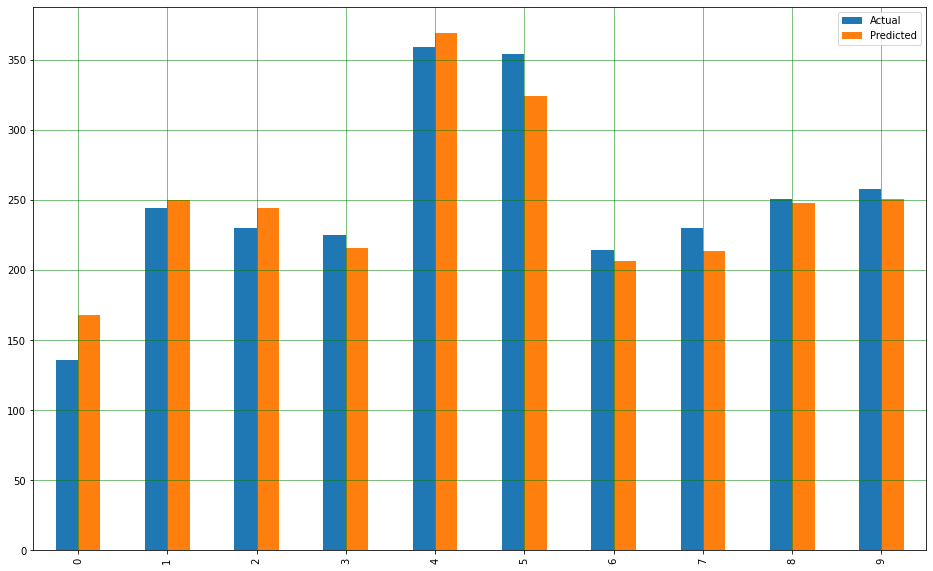

In [11]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()